In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
    
def createModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

print (y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print (y_test[0])

(50000, 32, 32, 3)
50000
10000
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


It's always a good idea to get an intuitive feel of the data you're dealing with, so let's display nine sample images from our training data, along with their labels. You can see here what the different categories represent, too.

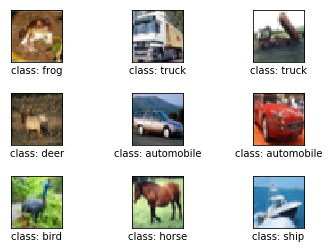

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])

    xlabel = "class: {0}".format(class_names[y_train[i].argmax()])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Now we can create and compile our CNN model. We'll use the RMSprop optimizer, create our model, and compile it.

In [5]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model = createModel(x_train.shape[1:])

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Let's have Keras output the topology to make sure it matches what we want.

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 16,783,754
Trainable params: 16,783,754
Non-trainable params: 0
________________________________________________________________

In [7]:
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 489us/step - loss: 1.6907 - acc: 0.3985 - val_loss: 1.4212 - val_acc: 0.4975
Epoch 2/10
50000/50000 [==============================] - 21s 424us/step - loss: 1.4003 - acc: 0.5068 - val_loss: 1.2904 - val_acc: 0.5489
Epoch 3/10
50000/50000 [==============================] - 22s 431us/step - loss: 1.2790 - acc: 0.5510 - val_loss: 1.2161 - val_acc: 0.5734
Epoch 4/10
50000/50000 [==============================] - 22s 435us/step - loss: 1.2002 - acc: 0.5797 - val_loss: 1.2424 - val_acc: 0.5640
Epoch 5/10
50000/50000 [==============================] - 22s 430us/step - loss: 1.1410 - acc: 0.6042 - val_loss: 1.1516 - val_acc: 0.5937
Epoch 6/10
50000/50000 [==============================] - 21s 430us/step - loss: 1.0923 - acc: 0.6235 - val_loss: 1.1512 - val_acc: 0.5992
Epoch 7/10
50000/50000 [==============================] - 21s 427us/step - loss: 1.0502 - acc: 0.6384 - val_loss: 1.

Now, let's measure the accuracy of our CNN against our test data:

In [8]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 59us/step
Test loss: 1.0943989763259887
Test accuracy: 0.6157


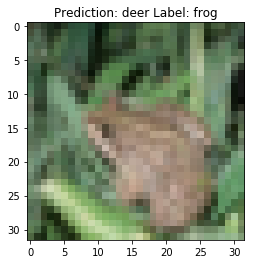

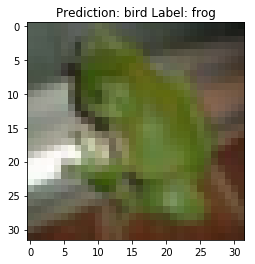

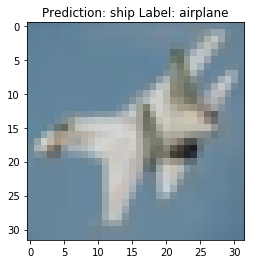

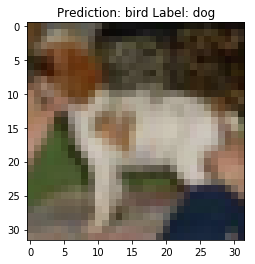

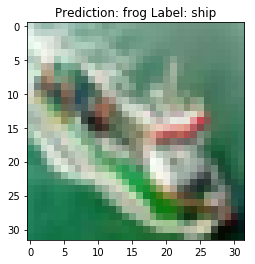

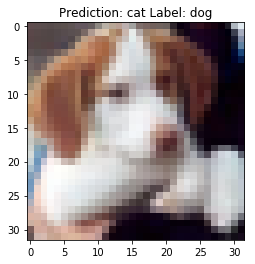

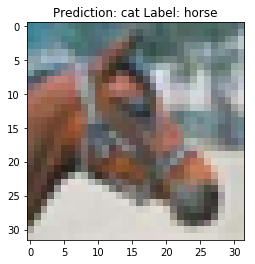

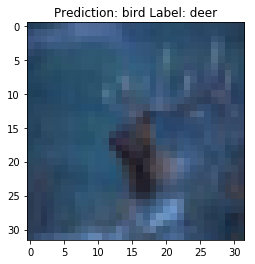

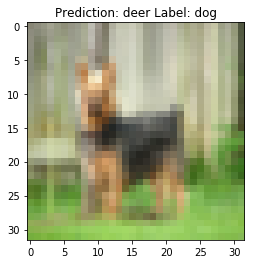

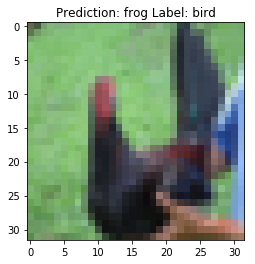

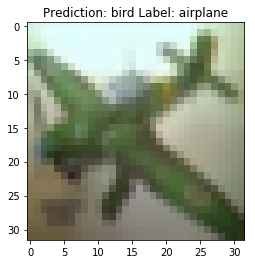

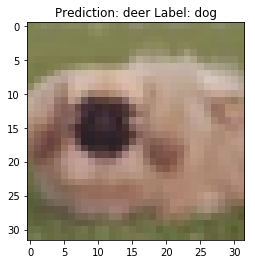

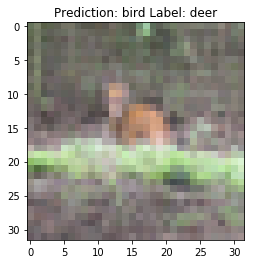

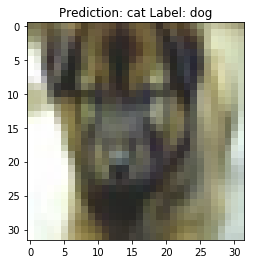

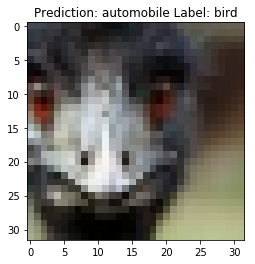

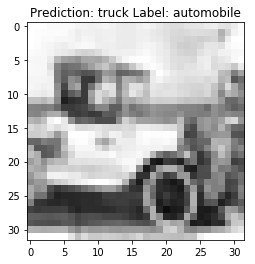

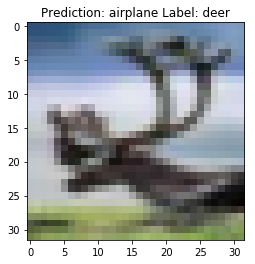

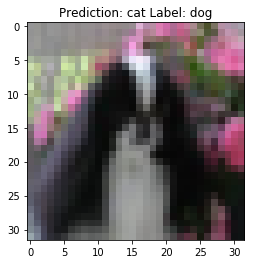

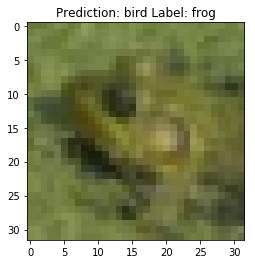

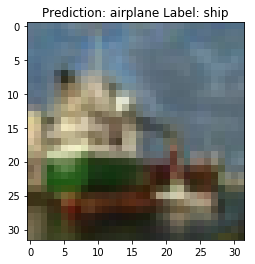

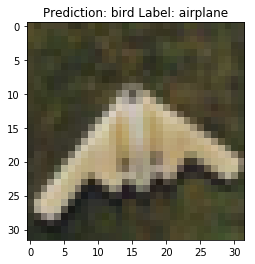

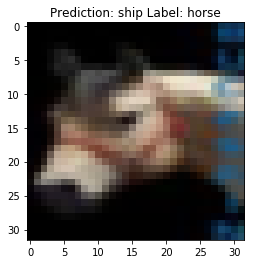

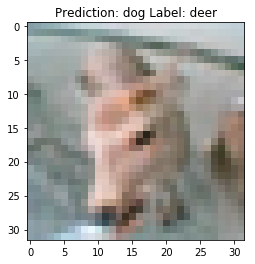

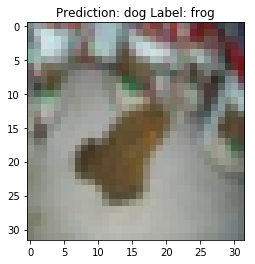

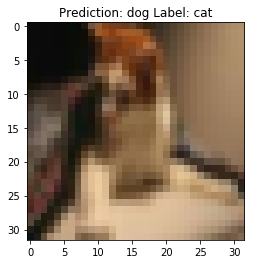

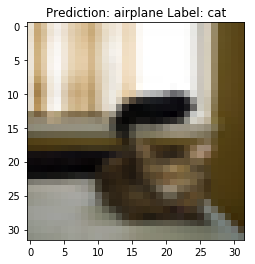

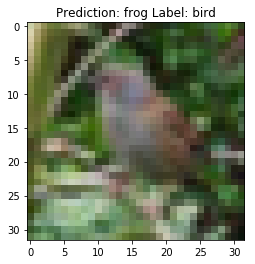

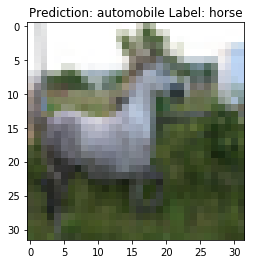

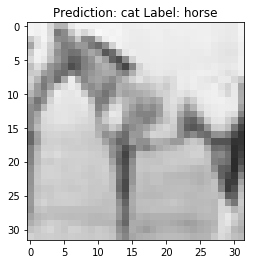

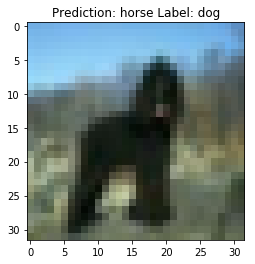

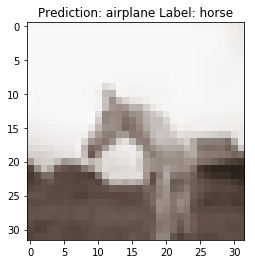

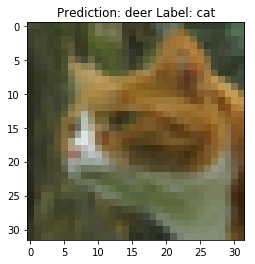

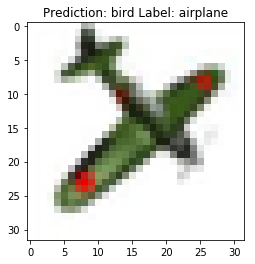

In [9]:
for x in range(100):
    test_image = x_test[x,:]
    predicted_cat = model.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()

Yeah, it's pretty bad. But CNN's are actually very powerful - we just haven't tuned it with the right topology, we haven't made it efficient enough to run enough epochs, and there are some other tricks we can use as well. Don't give up on them! We're about to improve on this model substantially.